In [83]:
import helpers as h
import schwarz_preconditioners as sp
from scipy.sparse.linalg import splu
import numpy as np
import matplotlib.pyplot as plt
import time

In [182]:
N = 16 # AKA H
n = 128 # AHA h
delta = 2 # AKA overlap

num_subdomains = int(n/N)**2
L = int(n/N) # Subdomains on each side 

if (n/N % 2 != 0):
    print("Will not work")

partition = np.zeros((num_subdomains, (n+1)**2))

for Nx in range(L):
    for Ny in range(L):
        lowerx = Nx*N - delta
        upperx = Nx*N + N + delta
        lowery = Ny*N - delta
        uppery = Ny*N + N + delta
        for i in range(n+1):
            for j in range(n+1):
                if i>=lowerx and i<=upperx and j>=lowery and j <=uppery:
                    partition[Nx + L*Ny, i + (n+1)*j] = 1
partition = partition.T

In [173]:
A, b = h.assemble_fem_problem(n)

CG iteration 1, residual = 5.5778843947621075
CG iteration 2, residual = 5.458525677607472
CG iteration 3, residual = 5.341178974727997
CG iteration 4, residual = 5.223708523987777
CG iteration 5, residual = 5.107019100070434
CG iteration 6, residual = 4.992082578575422
CG iteration 7, residual = 4.878002825779394
CG iteration 8, residual = 4.764762738755879
CG iteration 9, residual = 4.652998157413566
CG iteration 10, residual = 4.542242950612048
CG iteration 11, residual = 4.43239325203274
CG iteration 12, residual = 4.323890090261156
CG iteration 13, residual = 4.216439037055193
CG iteration 14, residual = 4.1099357133806
CG iteration 15, residual = 4.0047027942053255
CG iteration 16, residual = 3.900534995809422
CG iteration 17, residual = 3.797340701036033
CG iteration 18, residual = 3.6953643815692163
CG iteration 19, residual = 3.594454574541265
CG iteration 20, residual = 3.4945328001238765
CG iteration 21, residual = 3.3957888173869373
CG iteration 22, residual = 3.29810650566

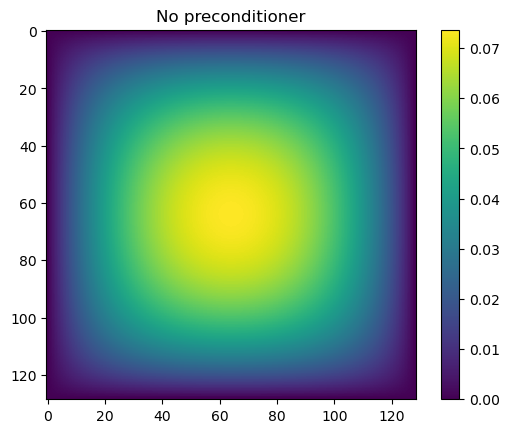

In [183]:
x0 = np.zeros_like(b)

start = time.time()
u_approx = h.cg(A, b, tol=1e-6, maxiter=200, x0=x0, pre=None)
stop = time.time()-start
print(stop)
res = u_approx.reshape(n+1,n+1)
plt.imshow(res)
plt.title("No preconditioner")
plt.colorbar()
plt.savefig("no_pre.png")
plt.show()

CG iteration 1, residual = 8.594061881749804
CG iteration 2, residual = 8.88186892797039
CG iteration 3, residual = 5.208266460789245
CG iteration 4, residual = 3.4801431788420167
CG iteration 5, residual = 3.9859339381065677
CG iteration 6, residual = 2.343271634659432
CG iteration 7, residual = 1.7006062938675932
CG iteration 8, residual = 1.8817648838403265
CG iteration 9, residual = 0.4002126475517627
CG iteration 10, residual = 0.33196586513462145
CG iteration 11, residual = 0.13110411601185942
CG iteration 12, residual = 0.03170213928279025
CG iteration 13, residual = 0.028053766312870706
CG iteration 14, residual = 0.015104363895347004
CG iteration 15, residual = 0.005748664621835841
CG iteration 16, residual = 0.0023807639923670684
CG iteration 17, residual = 0.0013617458306040193
CG iteration 18, residual = 0.0006907178895623609
CG iteration 19, residual = 0.0001513906814125076
CG iteration 20, residual = 9.740686143146426e-05
CG iteration 21, residual = 4.0928074318190326e-05

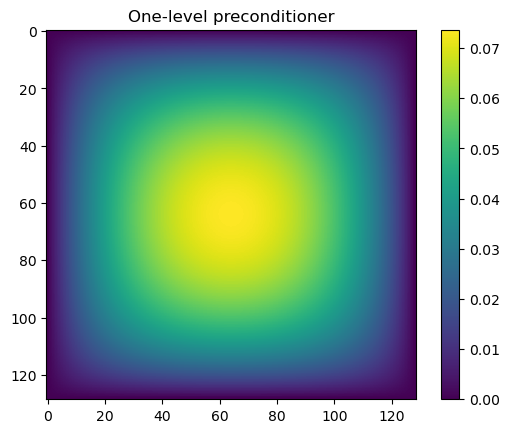

In [184]:
one_level = sp.OneLevelOASPreconditioner(A, partition)
x0 = np.zeros_like(b)

start = time.time()
u_approx = h.cg(A, b, tol=1e-6, maxiter=200, x0=x0, pre=one_level.apply)
stop = time.time() - start
print(stop)
res = u_approx.reshape(n+1,n+1)
plt.imshow(res)
plt.title("One-level preconditioner")
plt.colorbar()
plt.savefig("one_pre.png")
plt.show()

CG iteration 1, residual = 3.6720251908555865
CG iteration 2, residual = 1.6237917742189467
CG iteration 3, residual = 0.49191695697339377
CG iteration 4, residual = 0.13954607521595389
CG iteration 5, residual = 0.058984871664042336
CG iteration 6, residual = 0.018564419545215528
CG iteration 7, residual = 0.004153188737780777
CG iteration 8, residual = 0.0016094651791934596
CG iteration 9, residual = 0.0006090657195233962
CG iteration 10, residual = 0.00023641919116163752
CG iteration 11, residual = 7.961726482518284e-05
CG iteration 12, residual = 3.114824398875038e-05
CG iteration 13, residual = 6.358430551558271e-06
CG iteration 14, residual = 1.8130470596542218e-06
CG iteration 15, residual = 8.250864580727609e-07
0.11111259460449219


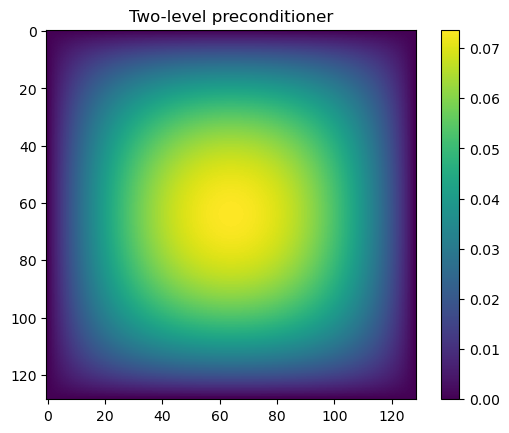

In [185]:
Phi = h.assemble_prolongation_operator(N, n)
two_level = sp.TwoLevelOASPreconditioner(A, partition, Phi)

x0 = np.zeros_like(b)

start = time.time()
u_approx = h.cg(A, b, tol=1e-6, maxiter=200, x0=x0, pre=two_level.apply)
stop = time.time() - start
print(stop)
res = u_approx.reshape(n+1,n+1)
plt.imshow(res)
plt.title("Two-level preconditioner")
plt.colorbar()
plt.savefig("two_pre.png")
plt.show()